### **📚 Deep Learning Project: Handwritten Digit Classification**
- Project Overview
- Objective: Build a neural network to classify handwritten digits from the MNIST dataset.
= Framework: Keras with TensorFlow backend.
- Dataset: MNIST (Modified National Institute of Standards and Technology)
- JULY 2024
- PARIAML AUTADE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from tensorflow.keras.datasets import mnist #MNIST DATASET
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")


- from tensorflow.keras.layers import Dense, Flatten
Use:
-- Dense: Adds fully connected layers to the neural network where each neuron is connected to every neuron in the previous layer.
-- Flatten: Converts the 2D image data into a 1D array so it can be used by the Dense layers.(2dto 1d)
- from tensorflow.keras.utils import to_categorical
-- Use: Converts class labels (numbers) into a one-hot encoded format, which is needed for classification tasks.


## **1.LOAD THE DATASET**

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


## **2.BUILD THE MODEL**

In [5]:
# Initialize the model
model = Sequential() # MODEL - neural network

# Add layers
model.add(Flatten(input_shape=(28, 28)))  # Flatten the input images: latten: This layer transforms the 2D image data (28x28 pixels) into a 1D array (a vector).
model.add(Dense(128, activation='relu'))   # Hidden layer with 128 neurons # hidden layers
model.add(Dense(10, activation='softmax')) # Output layer with 10 classes#output layer
# 10: This output layer has 10 neurons, corresponding to the 10 possible digit classes (0-9).

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#Compile: Set up the model with an optimizer, a loss function, and metrics for evaluation.


- *optimizer='adam': Adam is an optimization algorithm that adjusts the weights of the network during training to minimize the loss function.
- loss='categorical_crossentropy': This loss function is used for classification problems with multiple classes. It measures how well the predicted probabilities match the actual class labels.
- metrics=['accuracy']: Accuracy is the metric used to evaluate the performance of the model during training and testing*

**Build the Model: Define the neural network’s architecture.
- Compile the Model: Set up the optimization and evaluation criteria.
- Train the Model: Use training data to adjust the model’s weights and improve its accuracy**

**## 3.Train the model:**

In [6]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2849 - accuracy: 0.9196 - val_loss: 0.1553 - val_accuracy: 0.9543
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1289 - accuracy: 0.9626 - val_loss: 0.1246 - val_accuracy: 0.9627
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0896 - accuracy: 0.9734 - val_loss: 0.0992 - val_accuracy: 0.9709
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0656 - accuracy: 0.9804 - val_loss: 0.0895 - val_accuracy: 0.9711
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0495 - accuracy: 0.9852 - val_loss: 0.0940 - val_accuracy: 0.9723


- Epochs:Number of times the model will see the entire training dataset
- batch_size: Number of samples processed before the model's weights are updated
- validation_split=0 :Portion of training data to be used for validation

**4.Evaluate the model:**

In [8]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0905 - accuracy: 0.9741
Test Loss: 0.0904795378446579
Test Accuracy: 0.9740999937057495


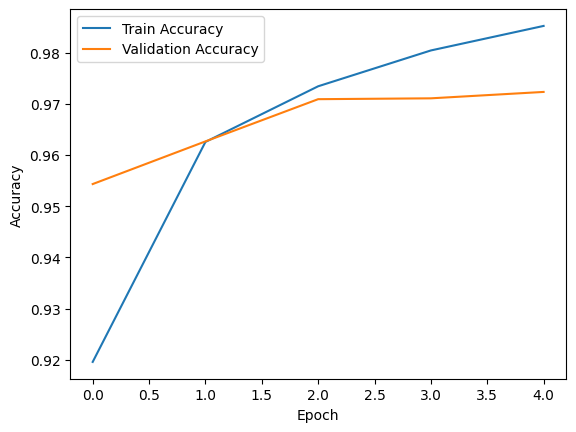

In [9]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Predict the class of the first test image
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
print(f"Predicted Label: {predicted_label}")

313/313 [==============================] - 1s 2ms/step
Predicted Label: 7


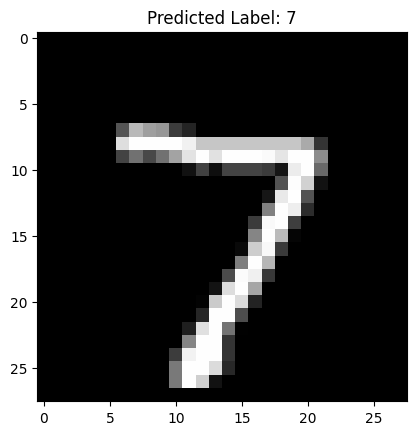

In [11]:
# Display the first test image and its prediction
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

In [17]:
# Predict the class of the first test image
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[1])
print(f"Predicted Label: {predicted_label}")

313/313 [==============================] - 1s 3ms/step
Predicted Label: 2


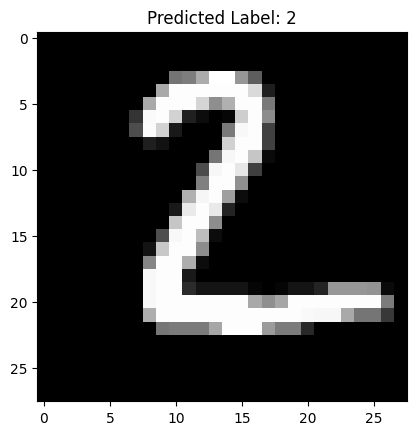

In [18]:
# Display the first test image and its prediction
plt.imshow(x_test[1], cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()

**SAVE THE MODEL**

In [20]:
model.save('mnist_model.h5')
